# Pandasでのbin分割

## cut関数
[ドキュメントより](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)

pandas.cut(x, bins, right: bool = True, labels=None, retbins: bool = False, precision: int = 3, include_lowest: bool = False, duplicates: str = 'raise')

####パラメータ
* x： 配列のようなビニングする入力配列。1次元である必要があります。

* bins：int、スカラーのシーケンス、またはIntervalIndex  
ビンする基準
 * int：xの範囲で等幅のビンの数を定義します。範囲Xは、最小値と最大値を含むように各側に0.1パーセントによって拡張されるXを。
 * スカラーのシーケンス：不均一な幅を可能にするビンエッジを定義します。xの範囲の拡張は行われません。

 * IntervalIndex：使用する正確なビンを定義します。ビンの IntervalIndexは重複してはならないことに注意してください。

* right：ブール、デフォルトはTrue
ビンに右端が含まれるかどうかを示します。（デフォルト）の場合 、ビン は（1,2]、（2,3]、（3,4]）を示します。binsがIntervalIndexの場合、この引数は無視され ます。right == True [1, 2, 3, 4]

* labels：配列またはFalse、デフォルトはなし
返されるビンのラベルを指定します。結果のビンと同じ長さでなければなりません。Falseの場合、ビンの整数インジケーターのみを返します。これは、出力コンテナーのタイプに影響します（以下を参照）。binsがIntervalIndexの場合、この引数は無視されます。Trueの場合、エラーが発生します。

* retbins： bool、デフォルトはFalse
ビンを返すかどうか。ビンがスカラーとして提供される場合に役立ちます。

* precision：精度整数、デフォルト3
ビンのラベルを保管および表示する精度。

* include_lowest： bool、デフォルトはFalse
最初の間隔を含める必要があるかどうか。

* duplicates{default 'raise'、 'drop'}、オプション
ビンのエッジが一意でない場合は、ValueErrorを発生させるか、一意でないものを削除します。





In [14]:
import numpy as np
import pandas as pd

In [15]:
frame = pd.DataFrame({'data1':np.random.randint(10,100,12)})
quartiles = pd.cut(frame.data1,4)
quartiles

0       (78.5, 98.0]
1     (19.922, 39.5]
2       (78.5, 98.0]
3     (19.922, 39.5]
4     (19.922, 39.5]
5       (59.0, 78.5]
6       (78.5, 98.0]
7       (78.5, 98.0]
8       (78.5, 98.0]
9       (59.0, 78.5]
10      (59.0, 78.5]
11    (19.922, 39.5]
Name: data1, dtype: category
Categories (4, interval[float64]): [(19.922, 39.5] < (39.5, 59.0] < (59.0, 78.5] < (78.5, 98.0]]

In [16]:
print(frame['data1'])

0     82
1     24
2     86
3     34
4     26
5     73
6     92
7     98
8     95
9     66
10    71
11    20
Name: data1, dtype: int64


cut関数で使われるビン分割する値の考え方

In [17]:
data_range = (frame['data1'].max() - frame['data1'].min())/4
print('4分割した時の1範囲：',data_range)
y = frame['data1'].min()
bins = [frame['data1'].min()]
for _ in range(4):
  y += data_range
  bins.append(y)

bins


4分割した時の1範囲： 19.5


[20, 39.5, 59.0, 78.5, 98.0]

In [18]:
def get_stats(group):
  return {'min':group.min(),'max':group.max(),'count':group.count(),'mean':group.mean()}

In [19]:
grouped = frame.data1.groupby(quartiles)

In [20]:
grouped.apply(get_stats).unstack()

min   max  count  mean
data1                                  
(19.922, 39.5]  20.0  34.0    4.0  26.0
(39.5, 59.0]     NaN   NaN    0.0   NaN
(59.0, 78.5]    66.0  73.0    3.0  70.0
(78.5, 98.0]    82.0  98.0    5.0  90.6

(array([4., 0., 3., 5.]),
 array([20. , 39.5, 59. , 78.5, 98. ]),
 <a list of 4 Patch objects>)

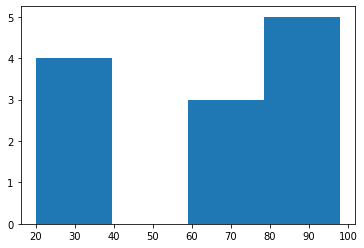

In [21]:
import matplotlib.pyplot as plt

plt.hist(frame['data1'],bins=4)

## qcut関数
[ドキュメントより](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)

pandas.qcut(x, q, labels=None, retbins: bool = False, precision: int = 3, duplicates: str = 'raise')

ランクまたはサンプル変位値に基づいて、変数を等しいサイズのバケットに離散化します。たとえば、10個の分位数の1000の値は、各データポイントの分位数メンバーシップを示すCategoricalオブジェクトを生成します。

#### パラメーター
* x： 1d ndarrayまたはシリーズ
* q： intまたはリストのようなint
分位数。分位数の場合は10、四分位数の場合は4など。四分位数の交互配列、たとえば、四分位数の場合は[0、.25、.5、.75、1.]。

* labels：配列またはFalse、デフォルトはなし
結果のビンのラベルとして使用されます。結果のビンと同じ長さでなければなりません。Falseの場合、ビンの整数インジケーターのみを返します。Trueの場合、エラーが発生します。

* retbins： bool、オプション
（ビン、ラベル）を返すかどうか。ビンがスカラーとして指定されている場合に役立ちます。

* precision：、オプション
ビンのラベルを保管および表示する精度。

* duplicates：{default 'raise'、 'drop'}、オプション
ビンのエッジが一意でない場合は、ValueErrorを発生させるか、一意でないものを削除します。



In [22]:
data_sort = frame['data1'].sort_values()
data_sort


11    20
1     24
4     26
3     34
9     66
10    71
5     73
0     82
2     86
6     92
8     95
7     98
Name: data1, dtype: int64

In [23]:
grouping = pd.qcut(frame.data1, 4)
grouping

0       (72.0, 87.5]
1     (19.999, 32.0]
2       (72.0, 87.5]
3       (32.0, 72.0]
4     (19.999, 32.0]
5       (72.0, 87.5]
6       (87.5, 98.0]
7       (87.5, 98.0]
8       (87.5, 98.0]
9       (32.0, 72.0]
10      (32.0, 72.0]
11    (19.999, 32.0]
Name: data1, dtype: category
Categories (4, interval[float64]): [(19.999, 32.0] < (32.0, 72.0] < (72.0, 87.5] < (87.5, 98.0]]

In [24]:
grouped = frame.data1.groupby(grouping)
grouped.apply(get_stats).unstack()

min   max  count       mean
data1                                       
(19.999, 32.0]  20.0  26.0    3.0  23.333333
(32.0, 72.0]    34.0  71.0    3.0  57.000000
(72.0, 87.5]    73.0  86.0    3.0  80.333333
(87.5, 98.0]    92.0  98.0    3.0  95.000000